# 1. Descripción del sistema de información real:

*El dataset con el se va a culminar el diplomado es el del trabajo guido de AIRBNB que se has venido utilizando Durante cada una de las etapas del diplomado, el mismo que trata sobre la calificación que los clientes dan a su hospedaje en barrios de Nueva York en diferentes categorias. 

En este caso se ha seleccionado 75 atributos, con  los cuales consideramos se puede aplicar cualquier modelo para tratar de determinar el precio del mismo entre los más importantes tenemos la latitud la longitud si el dueño es un superhost, el vecindario, la calle, el número de cuartos, el número de baños, las camas.  los beneficios incluidos en el departamento su disponibilidad en días, el número de visitas que ha hecho Los visitantes políticas de cancelación y una cosa que considera o que se le dio un valor agregado es la de dividir el campo de "amenities" en varias características es decir extraer el texto y transformarlo en variable categórica.

El origen de los datos es el que se nos facilitó en la Fase 1 del diplomado, los mismos que han sufrido transformación y se ha realizado limpieza de los mismos.

El problema que se quiere resolver es determinar que modelo de clasificación permita modelar el problema con una tasa de aciertos alta, para ello se va a proponer realizar un dodelo de redes neuronales MLP.

El Objetivo de análisis predictivo es obtener una buena estimación de una muestra estratificada considerable sobre los datos originales y poder determinar cuales son los atributos que más pueden influir en el modelo.



In [2]:
#importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#leer el archivo 'https://raw.githubusercontent.com/chris78rey/DIPLOM_BIGDATA/main/IPYNB_TODOS/airbnb_crrb_final.csv'
#guardarlo en la variable df separado por tabuladores y encoding de lenguaje español

df_airbnb_final = pd.read_csv('https://raw.githubusercontent.com/chris78rey/DIPLOM_BIGDATA/main/IPYNB_TODOS/AIRBNB_PARA_CLASIFICAR.csv')

df_airbnb_final.head()

,neighbourhood,latitude,longitude,property_type,bathrooms,bedrooms,beds,host_is_superhost,parking,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Target
0,18,40.65599,-73.97519,12,1.0,1,1,1,1,0,1,0,$50 AND $100
1,101,40.86754,-73.92639,1,1.0,1,1,0,1,0,1,0,$50 AND $100
2,18,40.66278,-73.97966,1,1.0,1,1,0,0,1,0,0,> $100
3,58,40.65944,-73.96238,1,1.0,1,1,0,1,1,0,0,> $100
4,18,40.67343,-73.98338,12,2.0,2,1,0,0,1,0,0,> $100


# 2.-Detección
Identificar y describir las variables en el conjunto de datos, junto con su dominio y tipología (numérico, lógico, carácter).
Recuerde que cualquierpersona debería estar en capacidad de entender su informe, la información presentada debe ser clara y precisa.

In [4]:
#Identificar y describir las variables en el conjunto de datos
#Identificar y describir las variables en el conjunto de datos, junto con su dominio y tipología (numérico, lógico, carácter)
df_airbnb_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9051 entries, 0 to 9050
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   neighbourhood              9051 non-null   int64  
 1   latitude                   9051 non-null   float64
 2   longitude                  9051 non-null   float64
 3   property_type              9051 non-null   int64  
 4   bathrooms                  9051 non-null   float64
 5   bedrooms                   9051 non-null   int64  
 6   beds                       9051 non-null   int64  
 7   host_is_superhost          9051 non-null   int64  
 8   parking                    9051 non-null   int64  
 9   room_type_Entire home/apt  9051 non-null   int64  
 10  room_type_Private room     9051 non-null   int64  
 11  room_type_Shared room      9051 non-null   int64  
 12  Target                     9051 non-null   object 
dtypes: float64(3), int64(9), object(1)
memory usage:

In [5]:
#estadística descriptiva de las variables numéricas
df_airbnb_final.describe()

,neighbourhood,latitude,longitude,property_type,bathrooms,bedrooms,beds,host_is_superhost,parking,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000
mean,78.580488,40.728757,-73.951798,4.454314,1.151420,1.260634,1.509446,0.085073,0.311347,0.473428,0.499945,0.026627
std,54.875995,0.055531,0.044750,7.786558,0.427214,0.603321,0.933475,0.279006,0.463070,0.499321,0.500028,0.160999
min,0.000000,40.506410,-74.244420,0.000000,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,40.690430,-73.981670,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,81.000000,40.720990,-73.954790,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111.000000,40.763580,-73.936115,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,185.000000,40.912340,-73.716900,31.000000,7.500000,8.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000


|Orden|Variable|bytes|no-null|Tipo|
|---|---|---|---|---|
| 0   |id                           |30179 |non-null  |int64|
| 1   |name                         |30179 |non-null  |object|
| 2   |host_id                      |30179 |non-null  |int64|
| 3   |host_response_time           |30179 |non-null  |object|
| 4   |host_response_rate           |30179 |non-null  |float64| 
| 5   |host_is_superhost            |30179| non-null|  float64|
| 6   |host_identity_verified       |30179| non-null|  float64|
| 7   |street                       |30179| non-null|  object |
| 8   |neighbourhood                |30179| non-null|  object |
| 9   |latitude                     |30179| non-null|  float64|
| 10  |longitude                    |30179| non-null|  float64|
| 11  |property_type                |30179| non-null|  object |
| 12  |room_type                    |30179| non-null|  object |
| 13  |accommodates                 |30179| non-null|  int64  |
| 14  |bathrooms                    |30179| non-null|  float64|
| 15  |bedrooms                     |30179| non-null|  int64  |
| 16  |beds                         |30179| non-null|  int64  |
| 17  |bed_type                     |30179| non-null|  object |
| 18  |price                        |30179| non-null|  int64  |
| 19  |guests_included              |30179| non-null|  int64  |
| 20  |extra_people                 |30179| non-null|  int64  |
| 21  |minimum_nights               |30179| non-null|  int64  |
| 22  |has_availability             |30179| non-null|  int64  |
| 23  |availability_30              |30179| non-null|  int64  |
| 24  |availability_60              |30179| non-null|  int64  |
| 25  |availability_90              |30179| non-null|  int64  |
| 26  |availability_365             |30179| non-null|  int64  |
| 27  |number_of_reviews            |30179| non-null|  int64  |
| 28  |review_scores_rating         |30179| non-null|  float64|
| 29  |review_scores_accuracy       |30179| non-null|  float64|
| 30  |review_scores_checkin        |30179| non-null|  float64|
| 31  |review_scores_communication  |30179| non-null|  float64|
| 32  |review_scores_location       |30179| non-null|  float64|
| 33  |review_scores_value          |30179| non-null|  float64|
| 34  |cancellation_policy          |30179| non-null|  object |
| 35  |check_in_24h                 |30179| non-null|  int64  |
| 36  |air_conditioning             |30179| non-null|  int64  |
| 37  |high_end_electronics         |30179| non-null|  int64  |
| 38  |bbq                          |30179| non-null|  int64  |
| 39  |balcony                      |30179| non-null|  int64  |
| 40  |nature_and_views             |30179| non-null|  int64  |
| 41  |bed_linen                    |30179| non-null|  int64  |
| 42  |breakfast                    |30179| non-null|  int64  |
| 43  |tv                           |30179| non-null|  int64  |
| 44  |coffee_machine               |30179| non-null|  int64  |
| 45  |cooking_basics               |30179| non-null|  int64  |
| 46  |white_goods                  |30179| non-null|  int64  |
| 47  |elevator                     |30179| non-null|  int64  |
| 48  |gym                          |30179| non-null|  int64  |
| 49  |child_friendly               |30179| non-null|  int64  |
| 50  |parking                      |30179| non-null|  int64  |
| 51  |outdoor_space                |30179| non-null|  int64  |
| 52  |host_greeting                |30179| non-null|  int64  |
| 53  |hot_tub_sauna_or_pool        |30179| non-null|  int64  |
| 54  |internet                     |30179| non-null|  int64  |
| 55  |long_term_stays              |30179| non-null|  int64  |
| 56  |pets_allowed                 |30179| non-null|  int64  |
| 57  |private_entrance             |30179| non-null|  int64  |
| 58  |secure                       |30179| non-null|  int64  |
| 59  |self_check_in                |30179| non-null|  int64  |
| 60  |smoking_allowed              |30179| non-null|  int64  |
| 61  |accessible                   |30179| non-null|  int64  |
| 62  |event_suitable               |30179| non-null|  int64  |
| 63  |TV                           |30179| non-null|  int64  |
| 64  |CABLE |TV|                     30179 non|-null  int64  |
| 65  |INTERNET                     |30179| non-null|  int64  |
| 66  |WIFI                         |30179| non-null|  int64  |
| 67  |WHEELCHAIR |ACCESSIBLE|        30179 non|-null  int64  |
| 68  |KITCHEN                      |30179| non-null|  int64  |
| 69  |FREE |PARKING| ON PREMISES     30179| non-null  int64  |
| 70  |ELEVATOR                     |30179| non-null|  int64  |
| 71  |WASHER                       |30179| non-null|  int64  |
| 72  |SMOKE |DETECTOR|               30179 non|-null  int64  |
| 73  |CARBON |MONOXIDE| DETECTOR     30179 no|n-null  int64  |
| 74  |FIRST |AID| KIT                30179 no|n-null  int64|

In [6]:
df_airbnb_final.head(2)

,neighbourhood,latitude,longitude,property_type,bathrooms,bedrooms,beds,host_is_superhost,parking,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Target
0,18,40.65599,-73.97519,12,1.0,1,1,1,1,0,1,0,$50 AND $100
1,101,40.86754,-73.92639,1,1.0,1,1,0,1,0,1,0,$50 AND $100


In [7]:
df_airbnb_final.shape

(9051, 13)

In [8]:
df_airbnb_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9051 entries, 0 to 9050
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   neighbourhood              9051 non-null   int64  
 1   latitude                   9051 non-null   float64
 2   longitude                  9051 non-null   float64
 3   property_type              9051 non-null   int64  
 4   bathrooms                  9051 non-null   float64
 5   bedrooms                   9051 non-null   int64  
 6   beds                       9051 non-null   int64  
 7   host_is_superhost          9051 non-null   int64  
 8   parking                    9051 non-null   int64  
 9   room_type_Entire home/apt  9051 non-null   int64  
 10  room_type_Private room     9051 non-null   int64  
 11  room_type_Shared room      9051 non-null   int64  
 12  Target                     9051 non-null   object 
dtypes: float64(3), int64(9), object(1)
memory usage:

#  3.-Análisis exploratorio
Usar las visualizaciones y estadísticas descriptivas para resumir y entender el comportamiento y estructura de los datos, recuerde que no es solo mostrar los estadísticos y gráficas, debe haber un análisis sistemático de cada variable y las relaciones existentes usando los recursos vistos en clase y listados a continuación.
Medidas de tendencia central
Medidas de dispersión
Histogramas
Diagramas de barras
Boxplots
Diagramas de dispersión – pair plots
Análisis de correlación

MEDIDAS DE TENDENCIA CENTRAL

In [9]:
#Determinar las medidas de tendencia central y dispersión de las variables numéricas del dataframe df_airbnb_final
df_airbnb_final.describe().T

,count,mean,std,min,25%,50%,75%,max
neighbourhood,9051.0,78.580488,54.875995,0.00000,18.00000,81.00000,111.000000,185.00000
latitude,9051.0,40.728757,0.055531,40.50641,40.69043,40.72099,40.763580,40.91234
longitude,9051.0,-73.951798,0.044750,-74.24442,-73.98167,-73.95479,-73.936115,-73.71690
property_type,9051.0,4.454314,7.786558,0.00000,1.00000,1.00000,1.000000,31.00000
bathrooms,9051.0,1.151420,0.427214,0.50000,1.00000,1.00000,1.000000,7.50000
bedrooms,9051.0,1.260634,0.603321,1.00000,1.00000,1.00000,1.000000,8.00000
beds,9051.0,1.509446,0.933475,1.00000,1.00000,1.00000,2.000000,14.00000
host_is_superhost,9051.0,0.085073,0.279006,0.00000,0.00000,0.00000,0.000000,1.00000
parking,9051.0,0.311347,0.463070,0.00000,0.00000,0.00000,1.000000,1.00000
room_type_Entire home/apt,9051.0,0.473428,0.499321,0.00000,0.00000,0.00000,1.000000,1.00000


**HISTOGRAMAS**

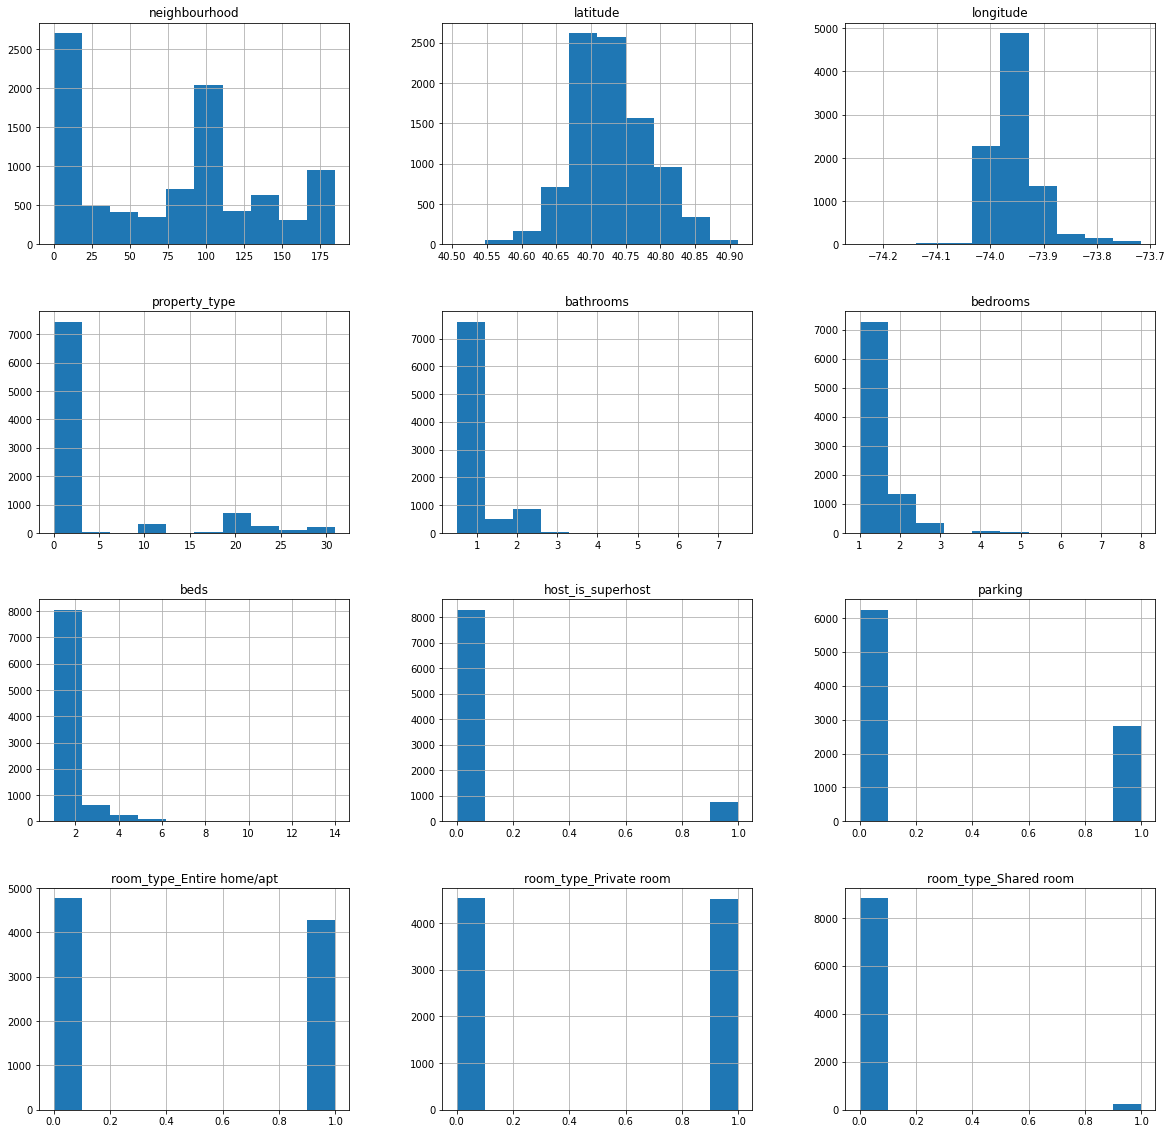

In [10]:
#Hacer los histogramas de las variables numéricas del dataframe df_airbnb_final 
df_airbnb_final.hist(figsize=(20,20))
plt.show()


**DIAGRAMA DE BARRAS**

In [11]:
#Se agrupan las variables numéricas por clase Class
df_airbnb_final_count=  df_airbnb_final.groupby('Target').sum()
df_airbnb_final_count

,neighbourhood,latitude,longitude,property_type,bathrooms,bedrooms,beds,host_is_superhost,parking,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
Target,,,,,,,,,,,,
$30 AND $50,86481,52282.14503,-94925.56212,7162,1566.5,1343,1499,123,389,31,1171,82
$50 AND $100,246435,132894.44182,-241282.74721,13541,3602.5,3509,3967,306,1065,674,2519,70
< $30,7728,4031.51667,-7318.45062,645,117.0,103,133,5,36,3,51,45
> $100,370588,179427.87312,-325810.96256,18968,5135.5,6455,8063,336,1328,3577,784,44


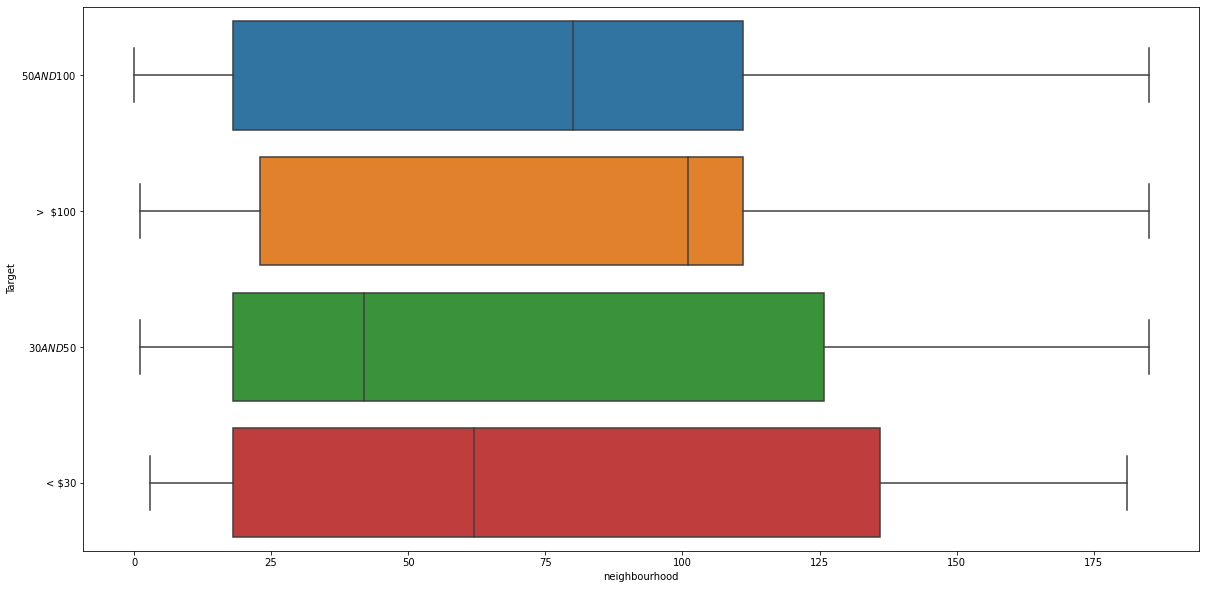

In [12]:
#Se hace los boxplot de la variable neighbourhood por clase Target
plt.figure(figsize=(20,10))
sns.boxplot(x='neighbourhood', y='Target', data=df_airbnb_final)
plt.show()

<AxesSubplot:xlabel='latitude', ylabel='Target'>

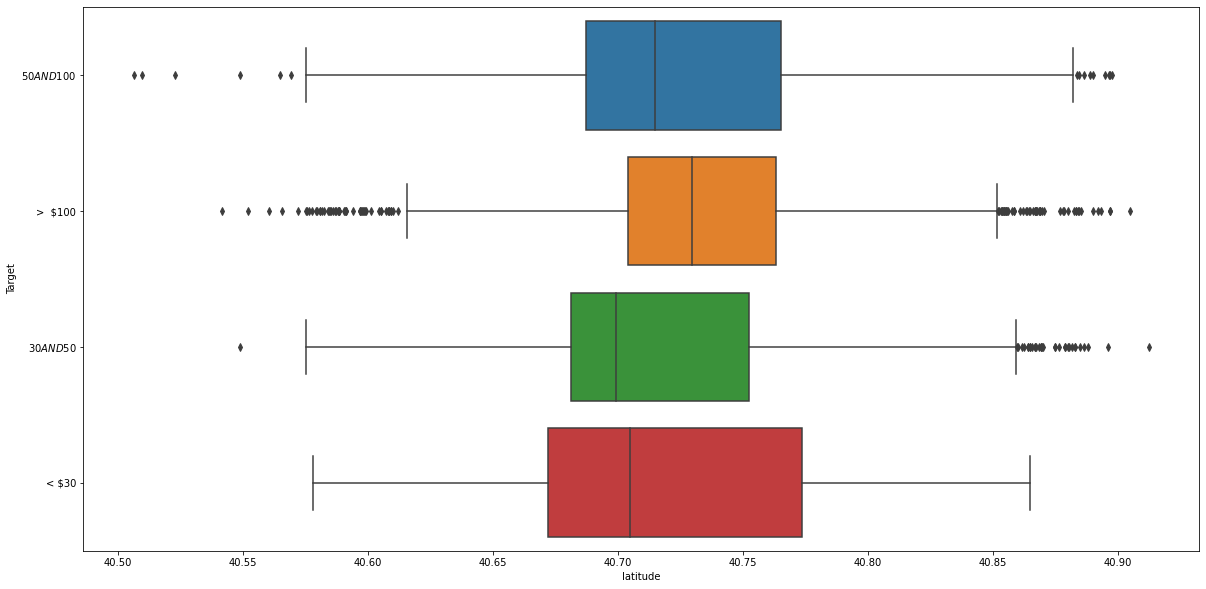

In [13]:
#Se hace los boxplot de la variable latitude por clase Target
plt.figure(figsize=(20,10))
sns.boxplot(x='latitude', y='Target', data=df_airbnb_final)


<AxesSubplot:xlabel='longitude', ylabel='Target'>

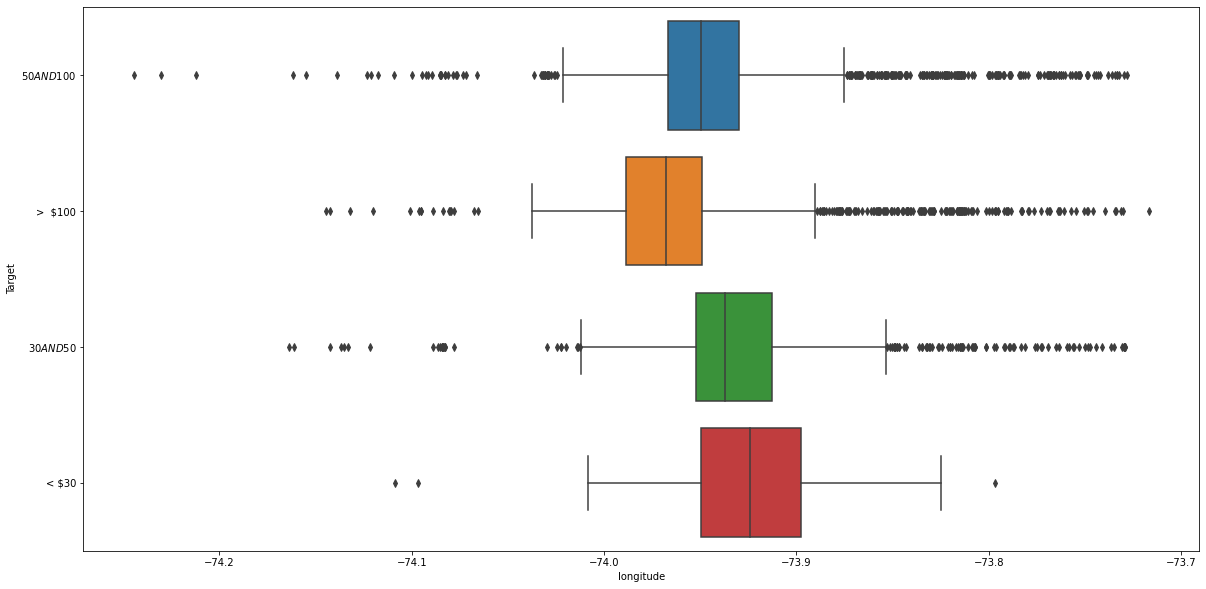

In [14]:

plt.figure(figsize=(20,10))
sns.boxplot(x='longitude', y='Target', data=df_airbnb_final)

<AxesSubplot:xlabel='property_type', ylabel='Target'>

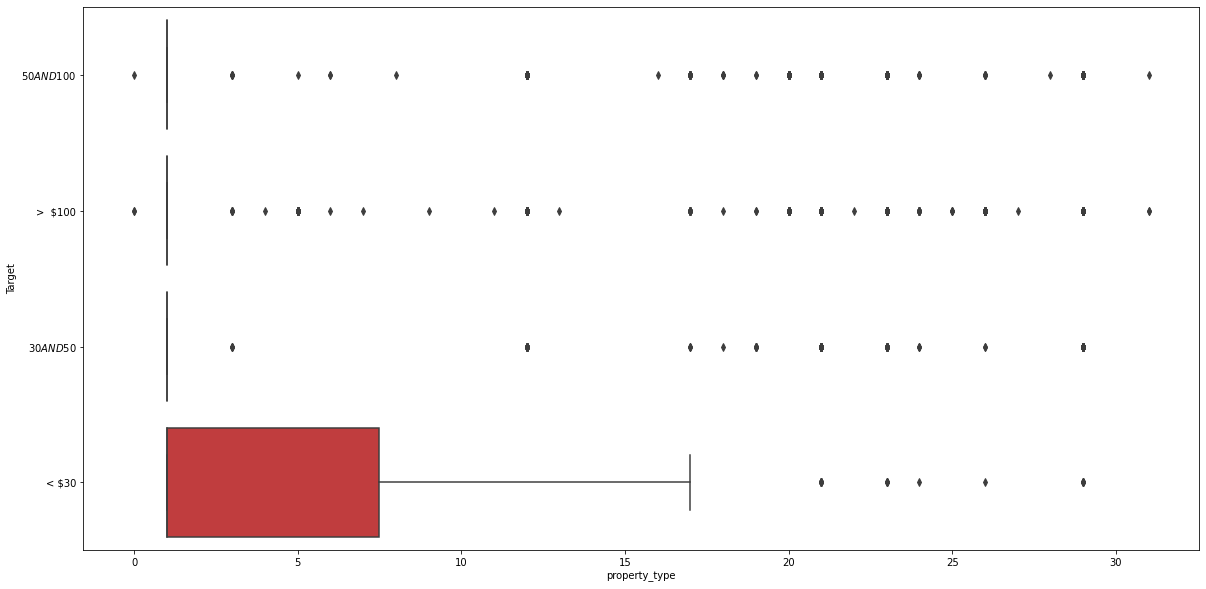

In [15]:
#Se hace los boxplot de la variable property_type por clase Target 
plt.figure(figsize=(20,10))
sns.boxplot(x='property_type', y='Target', data=df_airbnb_final)

<AxesSubplot:xlabel='property_type', ylabel='Target'>

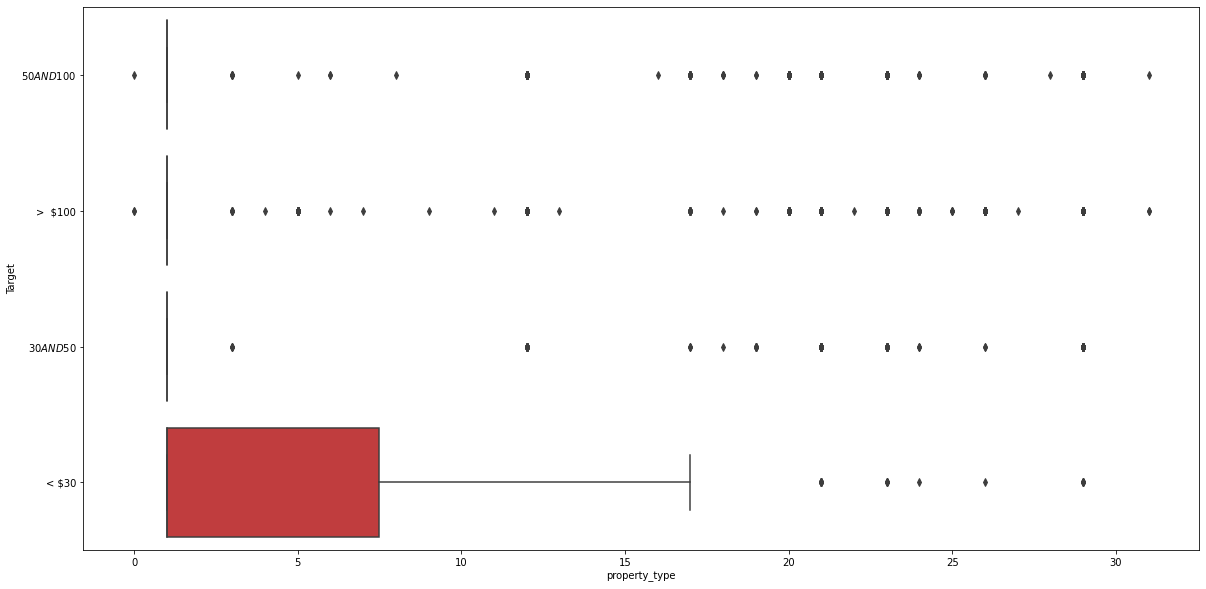

In [16]:
#Se hace los boxplot de la variable bathrooms por clase Target 
plt.figure(figsize=(20,10))
sns.boxplot(x='property_type', y='Target', data=df_airbnb_final)

<AxesSubplot:xlabel='bathrooms', ylabel='Target'>

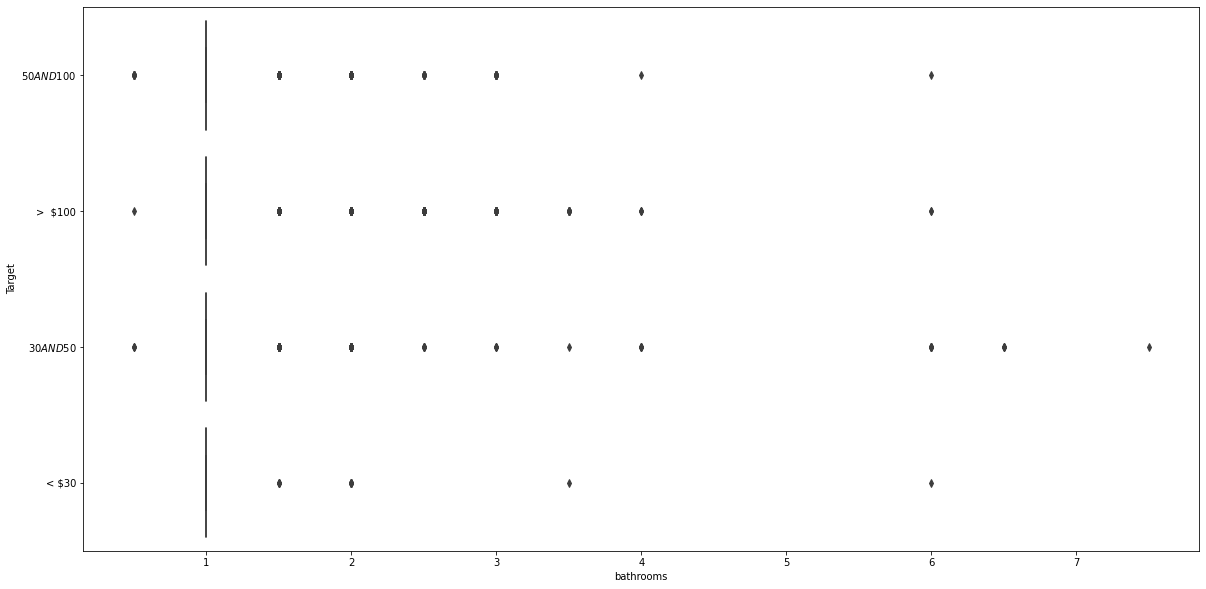

In [17]:
#bathrooms
plt.figure(figsize=(20,10))
sns.boxplot(x='bathrooms', y='Target', data=df_airbnb_final)

<AxesSubplot:xlabel='beds', ylabel='Target'>

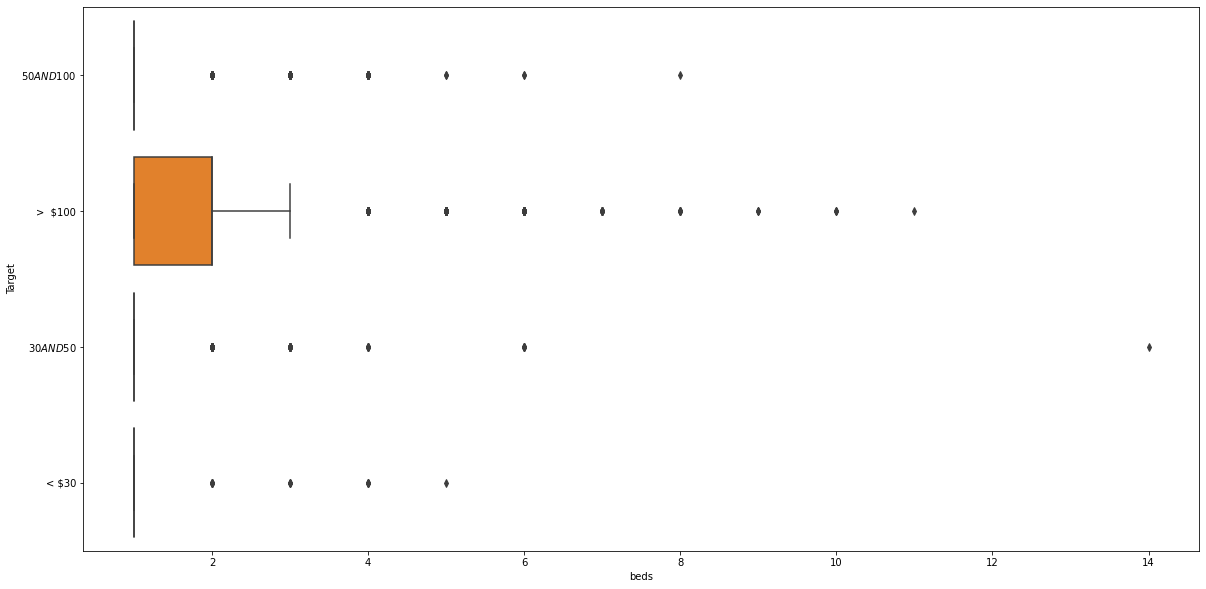

In [18]:
#beds
plt.figure(figsize=(20,10))
sns.boxplot(x='beds', y='Target', data=df_airbnb_final)

<AxesSubplot:xlabel='host_is_superhost', ylabel='Target'>

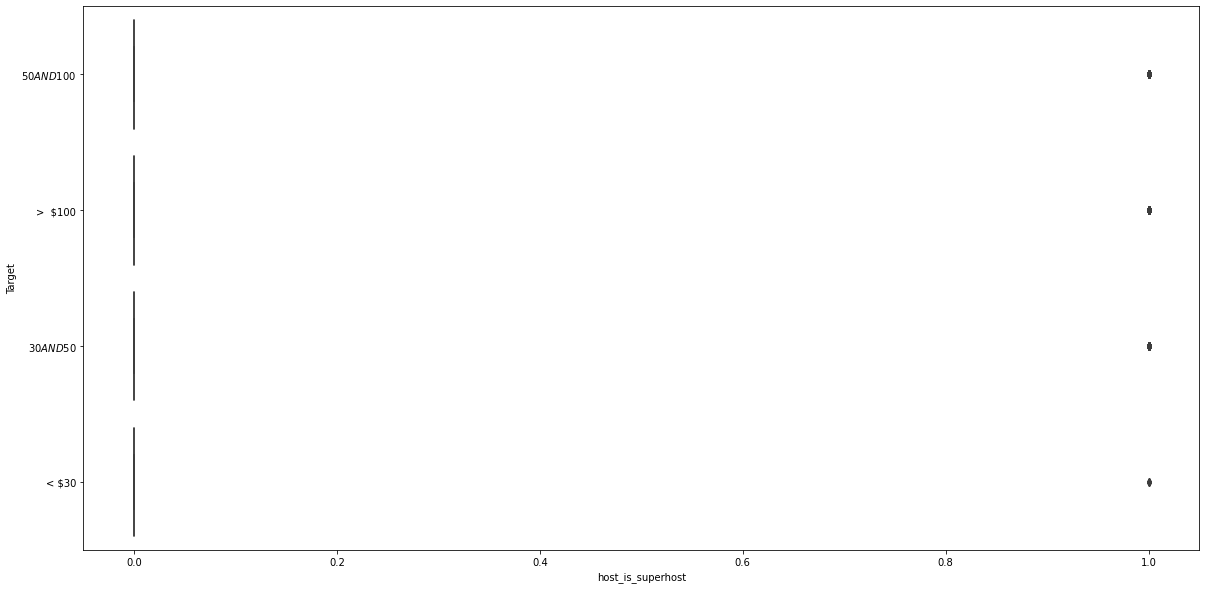

In [19]:
#host_is_superhost
plt.figure(figsize=(20,10))
sns.boxplot(x='host_is_superhost', y='Target', data=df_airbnb_final)

<AxesSubplot:xlabel='parking', ylabel='Target'>

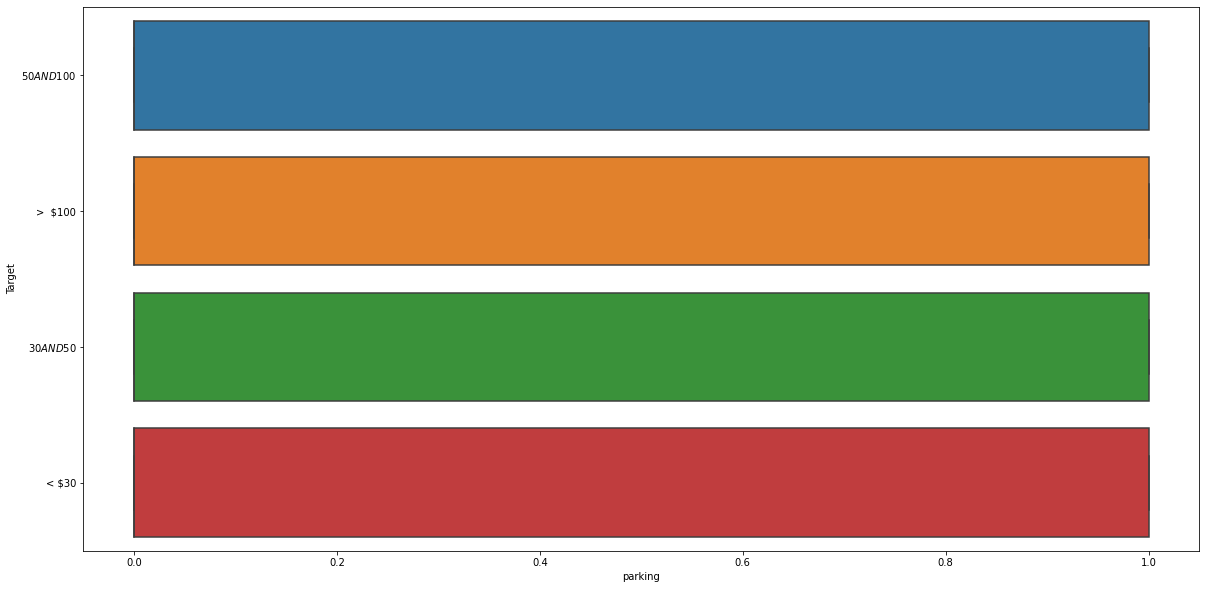

In [20]:
#parking
plt.figure(figsize=(20,10))
sns.boxplot(x='parking', y='Target', data=df_airbnb_final)

<AxesSubplot:xlabel='room_type_Entire home/apt', ylabel='Target'>

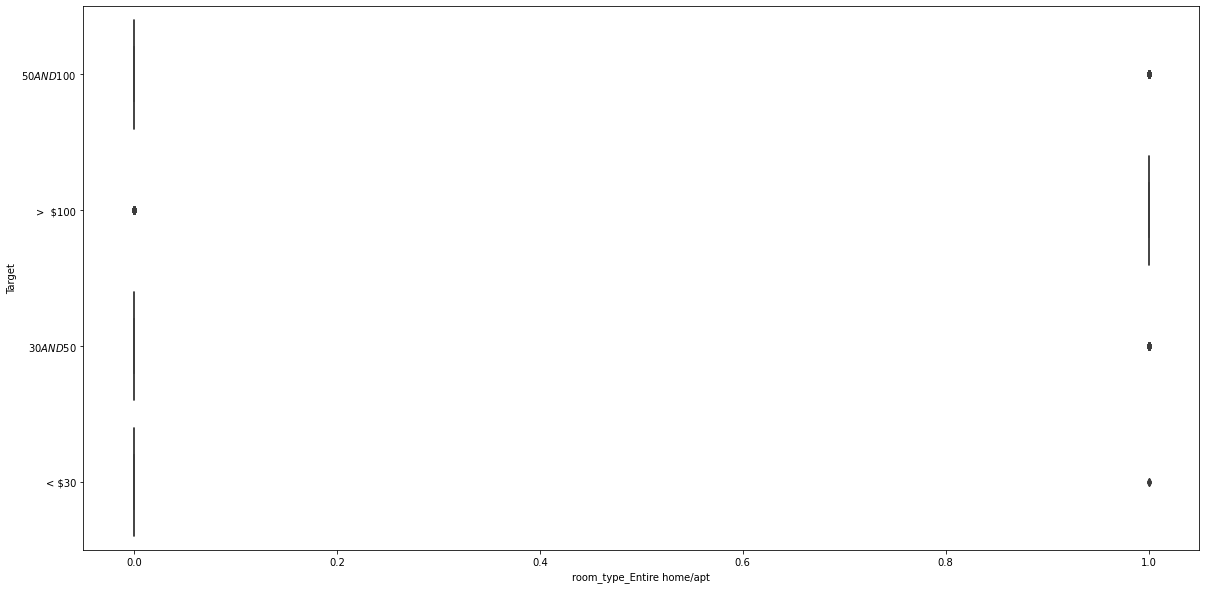

In [21]:
#room_type_Entire home/apt	
plt.figure(figsize=(20,10))
sns.boxplot(x='room_type_Entire home/apt', y='Target', data=df_airbnb_final)


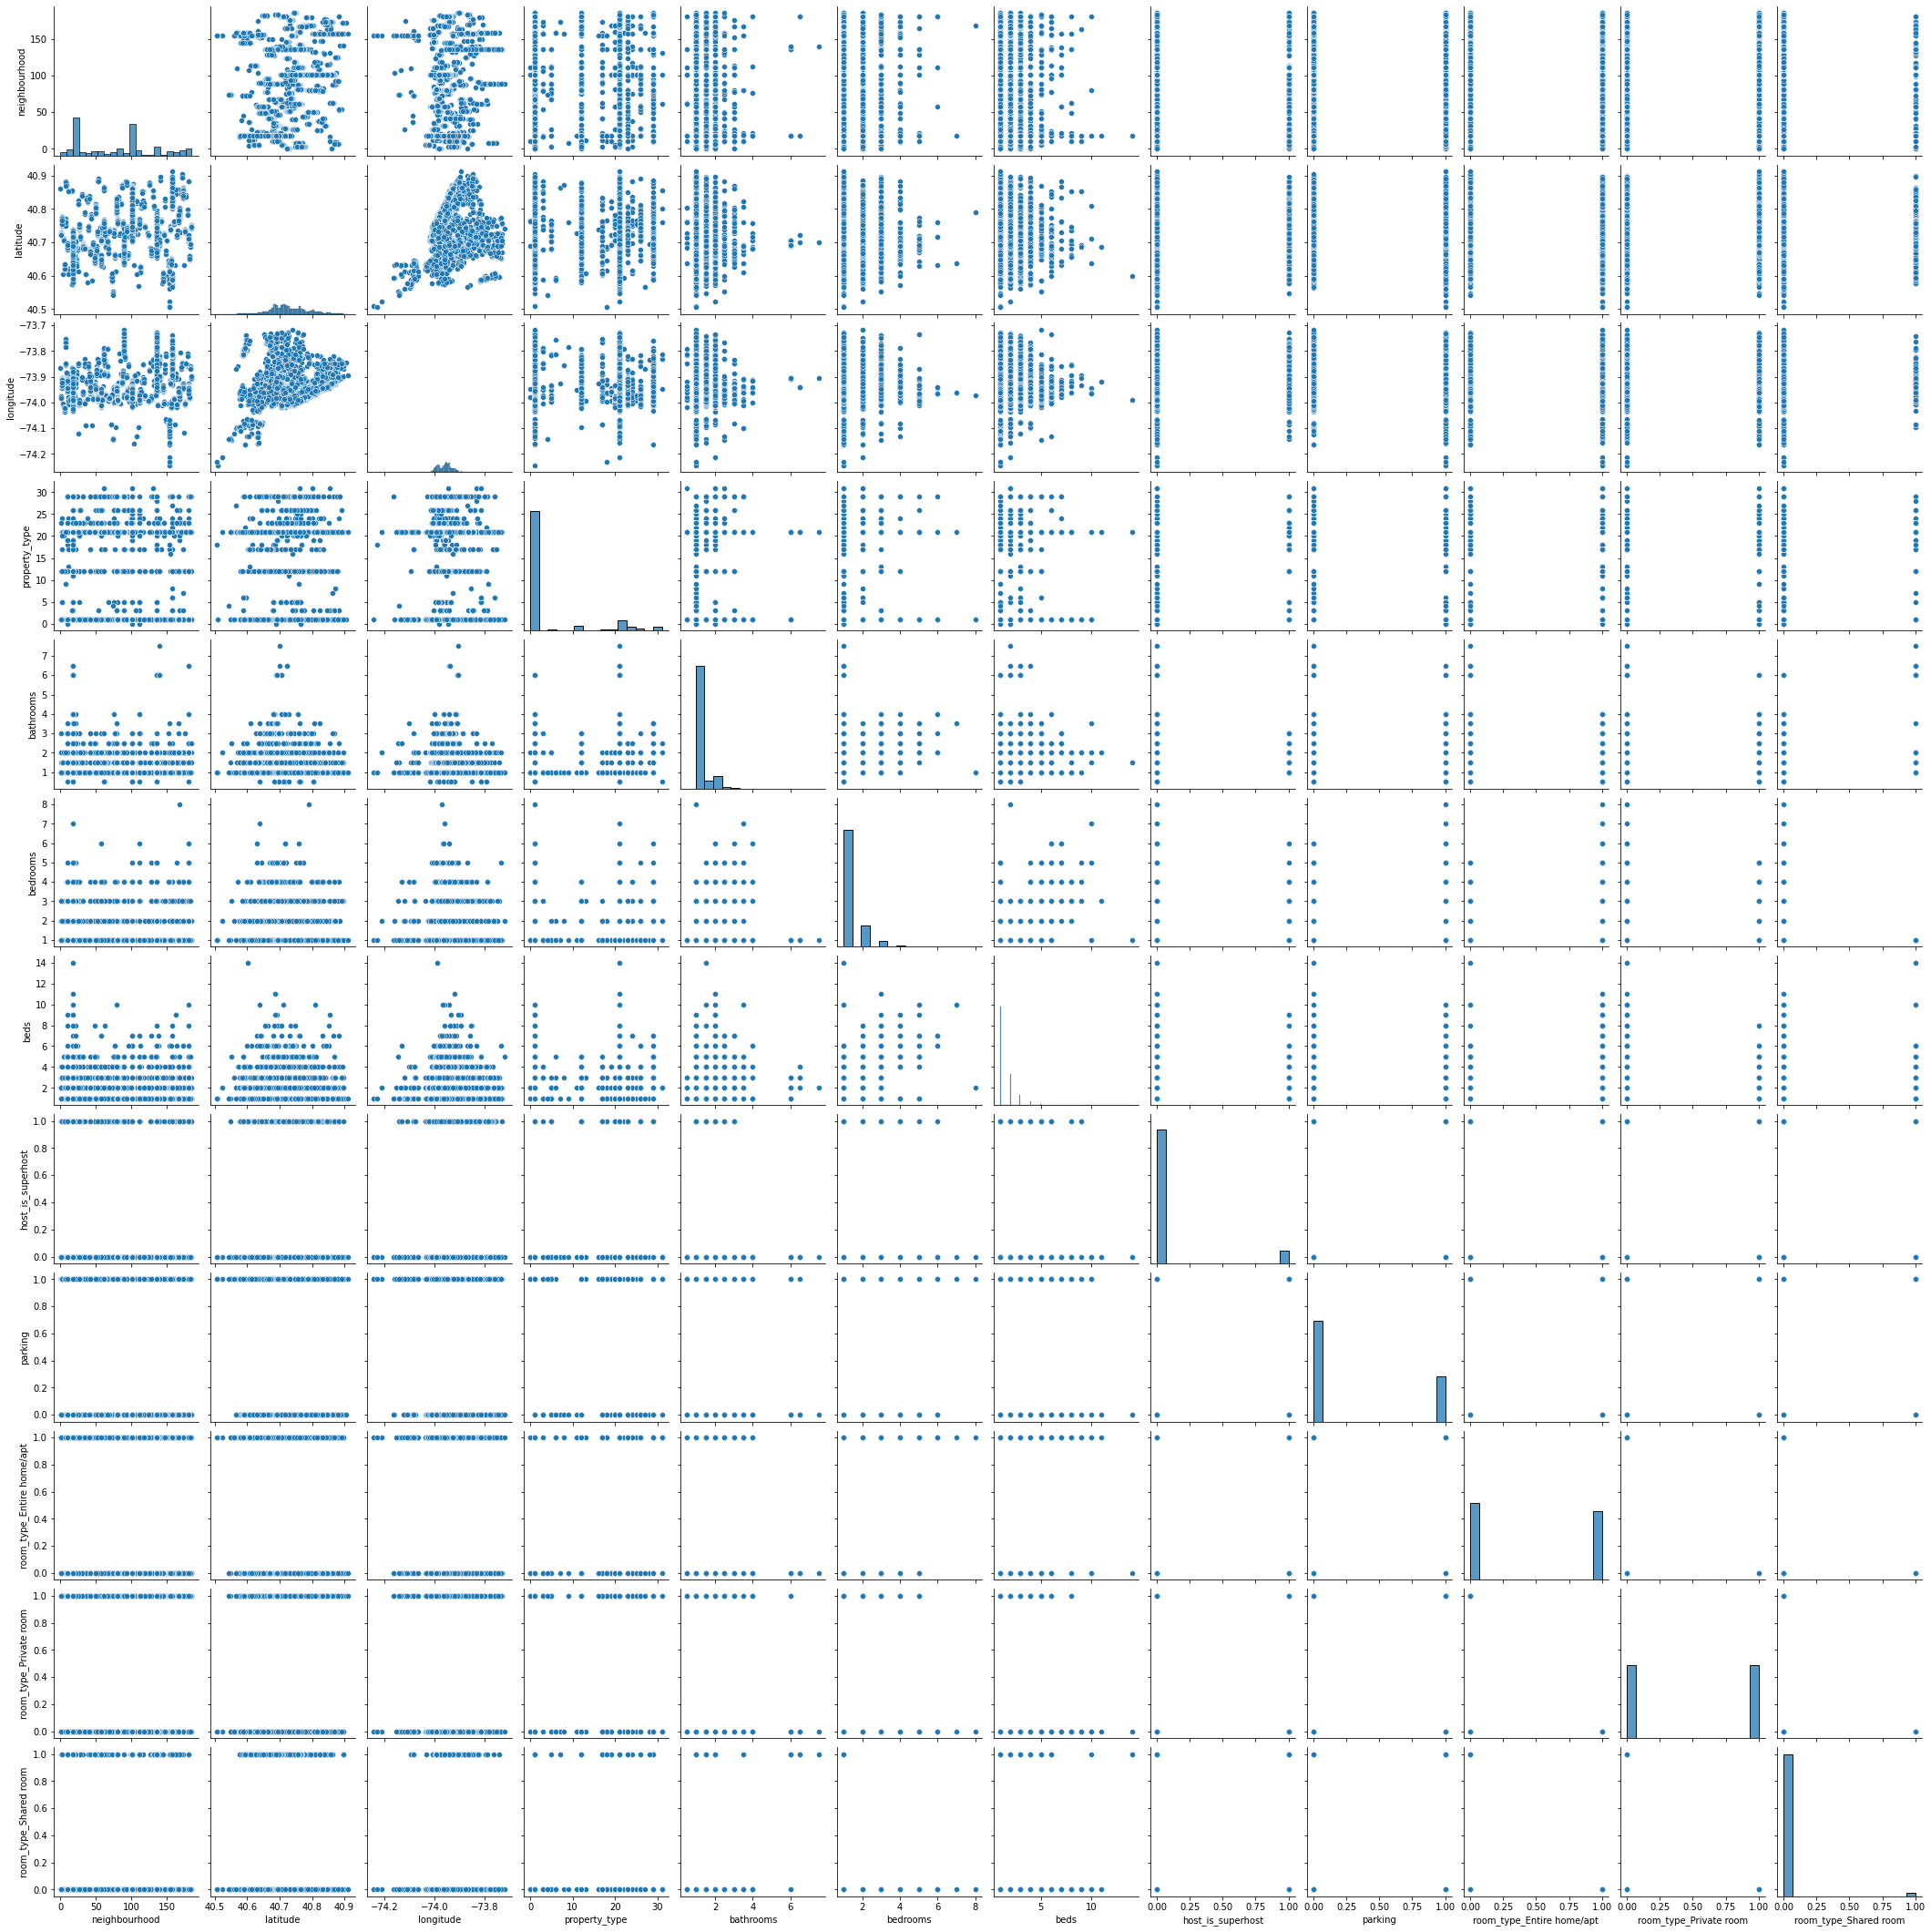

In [22]:
#luego se hace el diagrama de dispersión de las variables numéricas del dataframe df_airbnb_final
sns.pairplot(df_airbnb_final.iloc[:,:] )

<AxesSubplot:>

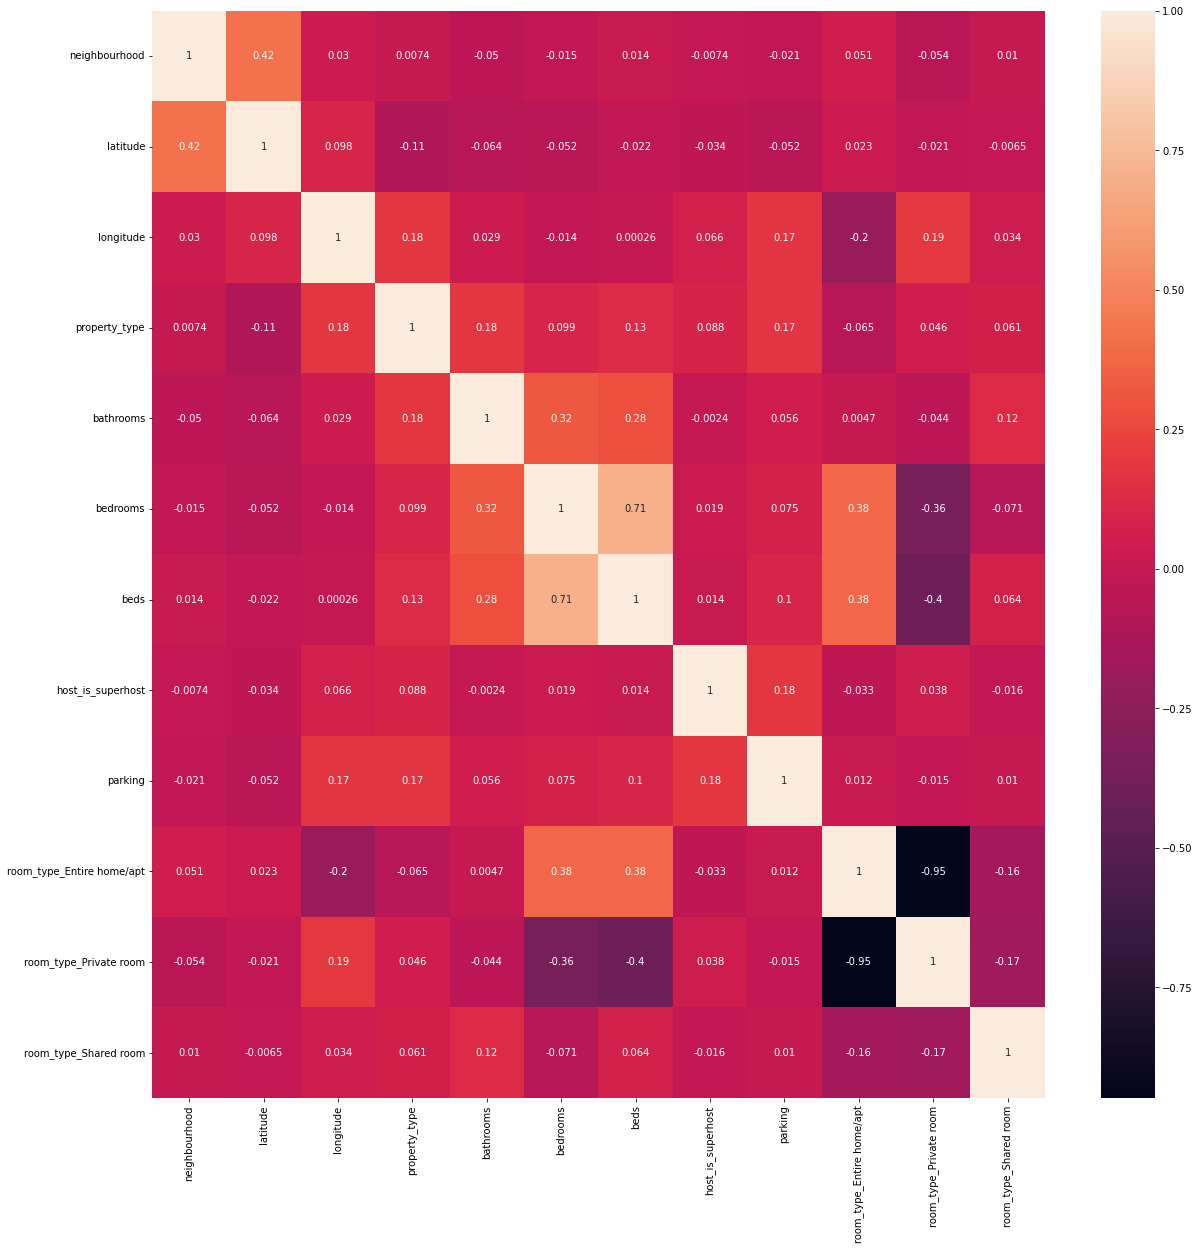

In [23]:
#hacer gráfico de la correlación de las 15 primeras variables numéricas del dataframe df_airbnb_final
plt.figure(figsize=(20,20))
correla=df_airbnb_final.iloc[:,:].corr()
sns.heatmap(df_airbnb_final.iloc[:,:].corr(),annot=True)

#  4.- Corrección de datos
- Identificar las variables que se pueden excluir del conjunto de datos, justificar el criterio empleado.
- Identificar y corregir la presencia de valores faltantes.
- Identificar y corregir la presencia de valores outliers.


In [24]:
#en base a correlacion determinar que variables se pueden eliminar
#eliminar las variables que tienen una correlación mayor a 0.9
correla

,neighbourhood,latitude,longitude,property_type,bathrooms,bedrooms,beds,host_is_superhost,parking,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
neighbourhood,1.000000,0.416194,0.030460,0.007382,-0.050013,-0.015140,0.014490,-0.007390,-0.021015,0.051269,-0.054479,0.010194
latitude,0.416194,1.000000,0.098373,-0.110349,-0.064453,-0.052380,-0.022367,-0.033634,-0.051565,0.023089,-0.020977,-0.006459
longitude,0.030460,0.098373,1.000000,0.179575,0.029410,-0.014373,0.000263,0.065876,0.170798,-0.202997,0.191797,0.033896
property_type,0.007382,-0.110349,0.179575,1.000000,0.184981,0.099242,0.128156,0.088254,0.173167,-0.065330,0.045698,0.060687
bathrooms,-0.050013,-0.064453,0.029410,0.184981,1.000000,0.316727,0.280488,-0.002404,0.055743,0.004748,-0.043540,0.120501
bedrooms,-0.015140,-0.052380,-0.014373,0.099242,0.316727,1.000000,0.705188,0.018585,0.074566,0.382634,-0.359086,-0.071454
beds,0.014490,-0.022367,0.000263,0.128156,0.280488,0.705188,1.000000,0.013885,0.101580,0.376940,-0.397056,0.064130
host_is_superhost,-0.007390,-0.033634,0.065876,0.088254,-0.002404,0.018585,0.013885,1.000000,0.184958,-0.032947,0.038051,-0.015996
parking,-0.021015,-0.051565,0.170798,0.173167,0.055743,0.074566,0.101580,0.184958,1.000000,0.011889,-0.015196,0.010324
room_type_Entire home/apt,0.051269,0.023089,-0.202997,-0.065330,0.004748,0.382634,0.376940,-0.032947,0.011889,1.000000,-0.948092,-0.156826


## correcion de datos

In [25]:
#se corrige los datos numericos faltantes con la moda de la columna
df_airbnb_final['bathrooms'].fillna(df_airbnb_final['bathrooms'].mode()[0], inplace=True)
df_airbnb_final['beds'].fillna(df_airbnb_final['beds'].mode()[0], inplace=True)
df_airbnb_final['parking'].fillna(df_airbnb_final['parking'].mode()[0], inplace=True)
df_airbnb_final['host_is_superhost'].fillna(df_airbnb_final['host_is_superhost'].mode()[0], inplace=True)
df_airbnb_final['room_type_Entire home/apt'].fillna(df_airbnb_final['room_type_Entire home/apt'].mode()[0], inplace=True)
df_airbnb_final['room_type_Private room'].fillna(df_airbnb_final['room_type_Private room'].mode()[0], inplace=True)


#  5.-Transformación
Numerizar variables categóricas usando variables dummy.
Transformar variables según tipología o crear nuevas variables.
Transformar variables numéricas usando normalización o estandarización.

**NORMALIZACION DE VARIABLES**

In [26]:
# Se normaliza los datos numericos y se lo almacena en un nuevo dataframe df_airbnb_final_nrm
df_airbnb_final_nrm = df_airbnb_final.copy()
df_airbnb_final_nrm['bathrooms'] = (df_airbnb_final_nrm['bathrooms'] - df_airbnb_final_nrm['bathrooms'].mean()) / df_airbnb_final_nrm['bathrooms'].std()
df_airbnb_final_nrm['beds'] = (df_airbnb_final_nrm['beds'] - df_airbnb_final_nrm['beds'].mean()) / df_airbnb_final_nrm['beds'].std()
df_airbnb_final_nrm['parking'] = (df_airbnb_final_nrm['parking'] - df_airbnb_final_nrm['parking'].mean()) / df_airbnb_final_nrm['parking'].std()
df_airbnb_final_nrm['host_is_superhost'] = (df_airbnb_final_nrm['host_is_superhost'] - df_airbnb_final_nrm['host_is_superhost'].mean()) / df_airbnb_final_nrm['host_is_superhost'].std()
df_airbnb_final_nrm['room_type_Entire home/apt'] = (df_airbnb_final_nrm['room_type_Entire home/apt'] - df_airbnb_final_nrm['room_type_Entire home/apt'].mean()) / df_airbnb_final_nrm['room_type_Entire home/apt'].std()
df_airbnb_final_nrm['room_type_Private room'] = (df_airbnb_final_nrm['room_type_Private room'] - df_airbnb_final_nrm['room_type_Private room'].mean()) / df_airbnb_final_nrm['room_type_Private room'].std()
df_airbnb_final_nrm['room_type_Shared room'] = (df_airbnb_final_nrm['room_type_Shared room'] - df_airbnb_final_nrm['room_type_Shared room'].mean()) / df_airbnb_final_nrm['room_type_Shared room'].std()
#neighbourhood
df_airbnb_final_nrm['neighbourhood'] = (df_airbnb_final_nrm['neighbourhood'] - df_airbnb_final_nrm['neighbourhood'].mean()) / df_airbnb_final_nrm['neighbourhood'].std()
df_airbnb_final_nrm['property_type'] = (df_airbnb_final_nrm['property_type'] - df_airbnb_final_nrm['property_type'].mean()) / df_airbnb_final_nrm['property_type'].std()
df_airbnb_final_nrm['bedrooms'] = (df_airbnb_final_nrm['bedrooms'] - df_airbnb_final_nrm['bedrooms'].mean()) / df_airbnb_final_nrm['bedrooms'].std()


# 6.- Partición de entrenamiento y prueba
Usar las técnicas vistas para crear un subconjunto de prueba y uno de entrenamiento.
Recuerde definir una semilla para que obtenga reproducibilidad durante la experimentación.

In [27]:
#      Partición de entrenamiento y prueba DE df_airbnb_final_nrm
#separamos los datos en entrenamiento y prueba
y = df_airbnb_final_nrm['Target']
X = df_airbnb_final_nrm.drop(['Target'], axis=1)

#separamos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# 7.- Modelamiento
Escoja 3 algoritmos de Machine Learning para hacer el entrenamiento de su modelo, puede escoger algoritmos no vistos en clase.
Haga un breve resumen de las ventajas y desventajas de los algoritmos escogidos.

In [28]:
#trabajar con el algoritmo de regresion logistica de scikitlearn con el dataframe df_airbnb_final_nrm 


#importamos las librerias necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#se crea el modelo de regresion logistica con sus parametros tipicos
regresion_logistica = LogisticRegression()

#se entrena el modelo
regresion_logistica.fit(X_train, y_train)

#se predice con el modelo
y_pred = regresion_logistica.predict(X_test)

#se calcula la matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_pred)
print(matriz_confusion)

#se calcula la precision del modelo
precision = accuracy_score(y_test, y_pred)
print(precision)
 

[[ 15 216   0   8]
 [ 23 510   0 145]
 [  5  13   0   3]
 [  9 156   0 708]]
0.6808393152954169


c:\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
#realiamos la clasificacion con Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#se crea el modelo de Naive Bayes con sus parametros tipicos
#hacer un for desde 1e-9 hasta 1e-8

var_smot=[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9]

for i in var_smot:
    naive_bayes = GaussianNB(var_smoothing= i)

    #se entrena el modelo
    naive_bayes.fit(X_train, y_train)

    #se predice con el modelo
    y_pred = naive_bayes.predict(X_test)

    #se calcula la matriz de confusion
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print(matriz_confusion)

    #se calcula la precision del modelo
    precision = accuracy_score(y_test, y_pred)
    print(precision)

[[ 64 151  15   9]
 [113 410  15 140]
 [  2   6  11   2]
 [ 28 132   7 706]]
0.6576477084483711
[[ 64 151  15   9]
 [113 410  15 140]
 [  2   6  11   2]
 [ 28 132   7 706]]
0.6576477084483711
[[ 64 151  15   9]
 [113 410  15 140]
 [  2   6  11   2]
 [ 28 132   7 706]]
0.6576477084483711
[[ 64 151  15   9]
 [113 410  15 140]
 [  2   6  11   2]
 [ 28 132   7 706]]
0.6576477084483711
[[ 63 152  15   9]
 [113 410  15 140]
 [  2   6  11   2]
 [ 28 132   7 706]]
0.6570955273329652
[[ 63 152  15   9]
 [111 412  15 140]
 [  2   6  11   2]
 [ 28 132   7 706]]
0.658199889563777
[[ 61 154  15   9]
 [109 412  15 142]
 [  2   6  11   2]
 [ 29 129   7 708]]
0.658199889563777
[[ 57 157  15  10]
 [102 415  14 147]
 [  2   6  11   2]
 [ 32 126   7 708]]
0.6576477084483711
[[ 41 173  15  10]
 [ 71 448  14 145]
 [  2   6  11   2]
 [ 20 138   7 708]]
0.6670347874102706
[[  4 210  15  10]
 [ 17 503  14 144]
 [  0   8  11   2]
 [  5 153   7 708]]
0.676974047487576
[[  0 202   0  37]
 [  0 470   0 208]
 [  0

In [30]:
#trabajar con el algoritmo MLP con los conjuntos de test y prueba con 100 iteraciones 10 capas ocultas y 20 neuronas por capa
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#se crea el modelo de MLP con sus parametros tipicos
mlp = MLPClassifier(hidden_layer_sizes=(10,20), max_iter=100)

#se entrena el modelo
mlp.fit(X_train, y_train)

#se predice con el modelo
y_pred = mlp.predict(X_test)

#se calcula la matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_pred)
print(matriz_confusion)

#se calcula la precision del modelo
precision = accuracy_score(y_test, y_pred)
print(precision)


[[ 10 220   2   7]
 [ 16 517   1 144]
 [  5  14   0   2]
 [  5 160   0 708]]
0.6819436775262286


# 8.1 Búsqueda de hiperparámetros óptimos
Haga experimentos sistemáticos para encontrar la combinación de hiperparámetros que produzcan el desempeño.
Si su problema es clasificación no olvide mostrar y analizar la matriz de confusión, así mismo discutir cuál de las métricas vistas en clase es la más útil de acuerdo a su aplicación.

**VARIAMOS LOS PARAMETROS DEL MLP**

In [32]:
#trabajar con el algoritmo MLP con los conjuntos de test y prueba con 100 iteraciones 10 capas ocultas y 20 neuronas por capa
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#se crea el modelo de MLP con sus parametros tipicos
lista_capas=[]
lista_neuronas=[]
lista_acuracy=[]



for capas in range(10,50):
    for neuronas in range(15,50):

        mlp = MLPClassifier(hidden_layer_sizes=(capas, neuronas), max_iter=20)
        #se entrena el modelo
        mlp.fit(X_train, y_train)
        #se predice con el modelo
        y_pred = mlp.predict(X_test)
        #se calcula la matriz de confusion
        matriz_confusion = confusion_matrix(y_test, y_pred)
        #print(matriz_confusion)
        #se calcula la precision del modelo
        precision = accuracy_score(y_test, y_pred)
        lista_acuracy.append(precision)
        lista_capas.append(capas)
        lista_neuronas.append(neuronas)

#juntar la tres listas y formar un dataframe con los resultados
df_resultados=pd.DataFrame({'capas':lista_capas,'neuronas':lista_neuronas,'accuracy':lista_acuracy})
df_resultados.sort_values(by=['accuracy'],ascending=False)
        

c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Ma

,capas,neuronas,accuracy
189,15,29,0.691883
70,12,15,0.690779
281,18,16,0.690779
475,23,35,0.690226
274,17,44,0.690226
...,...,...,...
63,11,43,0.627278
447,22,42,0.618443
786,32,31,0.607951
1259,45,49,0.605743


# 9.- Información adicional
La mayoría de modelos contienen información en forma de atributos que puede ser usada para analizar la toma de decisiones dentro del modelo.
Por ejemplo: en regresión lineal y regresión logística los coeficientes pueden ser interpretados.
En árbol de decisión y bosque aleatorio se puede obtener el parámetro de importancia de características.
En el árbol de decisión puede obtener un dibujo del árbol obtenido.

In [33]:
#hacerle regresión libear a los datos de df_airbnb_final
#separamos los datos en entrenamiento y prueba
y = df_airbnb_final['Target']
X = df_airbnb_final.drop(['Target'], axis=1)

#separamos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#trabajar con el algoritmo de regresion lineal de scikitlearn con el dataframe df_airbnb_final
#importamos las librerias necesarias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


#se crea el modelo de regresion lineal con sus parametros tipicos
regresion_lineal = LinearRegression()

#se entrena el modelo
regresion_lineal.fit(X_train, y_train)

#se predice con el modelo
y_pred = regresion_lineal.predict(X_test)

#se calcula la matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_pred)
print(matriz_confusion)

#se calcula la precision del modelo
precision = accuracy_score(y_test, y_pred)
print(precision)

#obtener los coeficientes de la regresion lineal y almacenarlos en un data frame
coeficientes = pd.DataFrame(regresion_lineal.coef_, X.columns, columns=['Coeficientes'])

coeficientes

ValueError: could not convert string to float: '>  $100'

**De acuerdo a esto se puede interpretar que dentro del modelo de regresión lineal influyen las variables  Pull-out Sofa, Couch y los tipos de cama**

# 10.-Conclusiones

- **¿Qué relaciones importantes encontró en el análisis exploratorio? ¿requirió hacer imputación o relleno de valores faltantes?** 
Se encontró relaciones importantes como la dependencia de ciertas variables que estan correlacionadas, y para el dataset debimos llenar valores faltantes.
- **¿Cuántas observaciones tuvo que eliminar en la preparación de los datos?**
Se eliminaron las observaciones que tenian en más de 10 campos variables nulas.
**Además de la numerización de variables categóricas ¿aplicó alguna transformación a sus datos?**
Sí, intente enriquecer el dataset separando los campos de la variable amenities pero se volvio el manejo muy complejo.
- **¿Cuál de los algoritmos le dio el modelo con mejor desempeño? ¿Cuál escogería para usar en producción?
Recuerde que las métricas no lo son todo, considere también la interpretabilidad del modeloy el tiempo de entrenamiento. Justifique su respuesta.**
En este caso como se puede apreciar en los datos intente realizar clasificación utilizando Random Forest, Naive Bayes y MLP, el que más se demoró fue este último pero dejo mejores valores de precision, pero quise también realizar una prueba con un modelo de regresión lineal que me parece se ajusta mucho mejor.
- **¿Se cumplió con el objetivo de análisis predictivo? ¿los resultados fueron los esperados?**
En el caso de la regresión lineal se obtuvieron mejores valores aplicando la valoración del modelo aplicando los scores, r2, pero considero que algo falto para acercarnos al valor deseado.
- **¿qué falta para que su modelo tenga el desempeño requerido?**
En este caso deberiamos profundizar e investigar más técnicas para optimizar los modelos, creo que me falto más tiempo para revisar nuevamente todo el material.
- ¿qué otro algoritmo podría emplear para lograr mejores resultados?
Creo que el Random Forest entendiendo mejor sus parámetros podría brndar mayores experiencias.
